<br>
<img src="Images/tvz_logo.png">
<br>

<center><h1>noSQL, BigData analiza #Stick2Me proizvoda</h1></center>
<center><h2>Dominik Košćica</h2></center>
<br>
<br>
<br>
<center><h2>Često gubite ili vam kradu ključeve, torbe, novčanike, kišobrane, kape? Želite pratiti vaše kućne ljubimce?</h2></center>
<br>
<img src="Images/stick2me_logo.png">
<center><h1>#Stick2Me</h1></center>

## Ključne značajke
<ul>
  <li>Aplikacija + sticker čine #Stick2Me</li>
  <li>Sticker koristi bluetooth beacon tehnologiju, a aplikacija će biti dostupna za iOS i Android uređaje</li>
  <li>Aplikacija prijavljuje korisniku udaljenost od svog novčanika, ključeva, kišobrana, torbe ili kućnog ljubimca</li>
  <li>Ovisno o postavkama aplikacija obaviještava/upozorava korisnika o prekoračenju zadane udaljenosti od vaših predmeta</li>
</ul>

## Ideja
<br>
<center><h2>Plasirat Stick2Me proizvod te pratiti odaziv, pohvale, kritike i suggestije u vezi samog proizvoda te ovisno o rezultatu prilagoditi proizvod traženim zahtjevima.</h2></center>
<br>
## Korištene tehnologije, jezici, servisi, alati i biblioteke
<ul>
  <li><a href="http://www.tweepy.org/">Tweepy</a><br>Python library za pristup Twitter API-u.</li>
  <br>
  <li><a href="https://api.mongodb.com/python/current/">PyMongo</a><br>Python library za pristup MongoDb-u.</li>
  <br>
  <li><a href="https://www.python.org/">Python 3.6</a></li>
  <br>
  <li><a href="https://www.mongodb.com/">MongoDB</a><br>Open-source document base NoSQL baza podataka.</li>
  <br>
  <li><a href="https://mlab.com">mLab</a><br>Besplatan Cloud based MongoDb database servis.</li>
  <br>
  <li><a href="https://robomongo.org/">RoboMongo</a><br>RoboMongo je IDE, Database manager za MongoDb bazu podataka.</li>
  <br>
  <li><a href="https://plot.ly/">Plotly</a><br>Kolabracijska platforma i python library sa izradu grafova.</li>  
</ul>


## Generalna struktura projekta

<ul> 
  <li>
      <h4>util.py</h4>
      <p>Sadrži kod za formatirani ispis u konzolu kao i TweetDocument model za mapiranje tweeta u MongoDb document.</p>
  </li>
  <li>
      <h4>tweepy_wrapper.py</h4>
      <p>Sadrži kod za autentifikaciju na tweeter API, metode za dohvaćanje informacija o korisniku, njegovim followerima, tweetovima kao i pomoćne metode za ispis relevantnih informacija vezani za twitter API.</p>
  </li>
  <li>
      <h4>pymongo_wrapper.py</h4>
      <p>Sadrži kod za spajanje na MongoDB bazu, transformiranje Tweeta objecta dobiven sa Tweepya u prihvatljiv MongoDB document oblik, unos u bazu kao i ispis iz baze.</p>
  </li>
  <li>
      <h4>nltk_wrapper.py</h4>
      <p>Sadrži kod za text mining.</p>
  </li>
  <li>
      <h4>sna_wrapper.py</h4>
      <p>Sadrži kod za SNA analizu.</p>
  </li>
    <li>
      <h4>main.py</h4>
      <p>Main klasa u kojoj se instanciraju TweepyWrapper, PyMongoWrapper, NLTKWrapper, SNAWrapper klase i pozivaju sve relevantne metode za analizu #Stick2Me proizvoda.</p>
  </li> 
</ul>

### util.py

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 29 23:37:43 2017

@author: Dominik
"""

from enum import Enum

class TweetDocument(Enum):
     created_at = "created_at"
     user_name = "user_name"
     text = "text"
     vertex1 = "screen_name"
     vertex2 = "in_reply_to_screen_name"
 
class PrintHelper(object):
    
    def print_header(text):
        print("")
        print("###############################################")
        print(text)
        print("###############################################")
    
    def print_footer():
        print("###############################################\n")
    
    def print_tweet(tweet):
        print("Date:", tweet.created_at)
        print("Name:", tweet.user.name)
        print("Text:", tweet.text)
        print("Vertex1:", tweet.user.screen_name)
        print("Vertex2:", tweet.in_reply_to_screen_name)
        print()       
  
    def print_user(user):
        print("Id:", user.id)
        print("Created at:", user.created_at)
        print("Name:", user.name)
        print("Screen name:", user.screen_name)
        print("Description:", user.description)
        print("Followers count:", user.followers_count)
        print("Friends count:", user.friends_count) 
        print("Favorites count:", user.favourites_count)
        print("Statuses count:", user.statuses_count)
        print()

'''
"""
Used to print html formated information
"""
def print_tweet(tweet):
    print(" <li>")
    print("   <b>Date:</b>", tweet.created_at, "<br>")
    print("   <b>Name:</b>", tweet.user.name, "<br>")
    print("   <b>Screen name:</b>", tweet.user.screen_name, "<br>")
    print("   <b>Text:</b>", tweet.text, "<br>")
    print(" </li>")
    
def print_user(user):
    print(" <li>")
    print("   <b>Id:</b>", user.id, "<br>")
    print("   <b>Created at:</b>", user.created_at, "<br>")
    print("   <b>Name:</b>", user.name, "<br>")
    print("   <b>Screen name:</b>", user.screen_name, "<br>")
    print("   <b>Description:</b>", user.description, "<br>")
    print("   <b>Followers count:</b>", user.followers_count, "<br>")
    print("   <b>Friends count:</b>", user.friends_count, "<br>")
    print("   <b>Favorites count:</b>", user.favourites_count, "<br>")
    print("   <b>Statuses count:</b>", user.statuses_count, "<br>")
    print(" </li>")
'''    

'\n"""\nUsed to print html formated information\n"""\ndef print_tweet(tweet):\n    print(" <li>")\n    print("   <b>Date:</b>", tweet.created_at, "<br>")\n    print("   <b>Name:</b>", tweet.user.name, "<br>")\n    print("   <b>Screen name:</b>", tweet.user.screen_name, "<br>")\n    print("   <b>Text:</b>", tweet.text, "<br>")\n    print(" </li>")\n    \ndef print_user(user):\n    print(" <li>")\n    print("   <b>Id:</b>", user.id, "<br>")\n    print("   <b>Created at:</b>", user.created_at, "<br>")\n    print("   <b>Name:</b>", user.name, "<br>")\n    print("   <b>Screen name:</b>", user.screen_name, "<br>")\n    print("   <b>Description:</b>", user.description, "<br>")\n    print("   <b>Followers count:</b>", user.followers_count, "<br>")\n    print("   <b>Friends count:</b>", user.friends_count, "<br>")\n    print("   <b>Favorites count:</b>", user.favourites_count, "<br>")\n    print("   <b>Statuses count:</b>", user.statuses_count, "<br>")\n    print(" </li>")\n'

### tweepy_wrapper.py

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 29 17:34:41 2017

@author: Dominik
"""
from util import PrintHelper 
import tweepy

class TweepyWrapper:
    
    #Constants
    CONSUMER_KEY = "GcCRUCVDeJf0H6zG7k3BqCsXV"
    CONSUMER_SECRET = "I6RvI3tFjnd5XL1BgfDNqqJ1bVSXinBYooTOGJpg7KCug9mlLt"
    ACCESS_TOKEN = "810627882104057856-nxELiESEiHYvZCbymNDI98us80A2Ayo"
    ACCESS_TOKEN_SECRET = "1uAWrovjiDQvztHfiG9K6C94MrIMs3GH1dncuJO5DXiAW"
    
    STICK2_ME_KEYWORDS = ["#Stick2Me", "Stick2Me", "stick2me", "stick", "Stick", "2me", "2Me"]
    
    #Members
    __followers = []
    __mostInfluentialFollowers = []

    __allMyTweets = []
    __allTweetsFromMyFollowers = []
        
    def __init__(self):
        #OAuth
        auth = tweepy.OAuthHandler(self.CONSUMER_KEY, self.CONSUMER_SECRET)
        auth.set_access_token(self.ACCESS_TOKEN,  self.ACCESS_TOKEN_SECRET)
        
        #Construct the API instance
        self.api = tweepy.API(auth)
        
    """
    Print methods
    """
    def print_user_information(self):
        PrintHelper.print_header("Get all the information about @TVZ_dkoscica")
        user = self.api.me()
        PrintHelper.print_user(user)
        
    """
    Follower methods
    """
    def get_my_followers(self):
        if not self.__followers:
            self.__followers = self.api.followers()
            return self.__followers
        return self.__followers
    
    def get_most_influential_followers(self):
        if not self.__mostInfluentialFollowers:
            self.__mostInfluentialFollowers = sorted(self.get_my_followers(), 
                                                     key=lambda user: user.statuses_count, reverse = True)
            return self.__mostInfluentialFollowers
        return self.__mostInfluentialFollowers
        
    def print_all_my_followers(self):
        PrintHelper.print_header("All my followers")
        for follower in self.get_my_followers():
            PrintHelper.print_user(follower)
            
    def print_most_influential_followers(self):
        PrintHelper.print_header("Top 10 most influential followers")
        for follower in self.get_most_influential_followers()[:10]:
           PrintHelper. print_user(follower)  
     
    """
    Tweets methods
    """
    def get_all_my_tweets(self):
        if not self.__allMyTweets:
            self.__allMyTweets = tweepy.Cursor(self.api.user_timeline).items()
            return self.__allMyTweets
        return self.__allMyTweets
        
    def get_all_tweets_from_user(self, screen_name):
        return self.api.user_timeline(screen_name = screen_name, count=1500) 
                
    def get_all_tweets_from_my_followers(self):
        if not self.__allTweetsFromMyFollowers:
            #allTweetsFromMyFollowers.append(allMyTweets)
            for follower in self.get_my_followers():
                allTweetsFromUser = self.get_all_tweets_from_user(follower.screen_name)
                self.__allTweetsFromMyFollowers.extend(allTweetsFromUser)
            return self.__allTweetsFromMyFollowers 
        return self.__allTweetsFromMyFollowers 
            
    def get_follower_tweets_which_contain_Stick2Me(self):
        tweetsThatContainStick2Me = []
        for tweet in self.get_all_tweets_from_my_followers():
            if any(word in tweet.text for word in self.STICK2_ME_KEYWORDS):
                tweetsThatContainStick2Me.append(tweet)
        return tweetsThatContainStick2Me
        
    def get_my_tweets_which_contain_Stick2Me(self):
        tweetsThatContainStick2Me = []
        for tweet in self.get_all_my_tweets():
            if any(word in tweet.text for word in self.STICK2_ME_KEYWORDS):
                tweetsThatContainStick2Me.append(tweet)
        return tweetsThatContainStick2Me

    def print_all_tweets_from_me(self):
        PrintHelper.print_header("All tweets from @TVZ_dkoscica")
        for tweet in self.get_all_my_tweets():
            PrintHelper.print_tweet(tweet)
            
    def print_retweets_of_me(self):
        retweets = self.api.retweets_of_me()
        numberOfRetweets = str(len(retweets))
        PrintHelper.print_header("Retweets of me\nNumber of retweets: "  + numberOfRetweets)
        for tweet in retweets:
            PrintHelper.print_tweet(tweet)
                           
    def print_all_tweets_which_contain_Stick2Me(self):
        allFollowerTweetsWhichContainStick2Me = self.get_follower_tweets_which_contain_Stick2Me()
        myTweetsWhichContainStick2Me = self.get_my_tweets_which_contain_Stick2Me()
        
        allTweetsWhichContainStick2Me = allFollowerTweetsWhichContainStick2Me + myTweetsWhichContainStick2Me
        allTweetsWhichContainStick2MeSortedByDate = sorted(allTweetsWhichContainStick2Me, key=lambda tweet: tweet.created_at, reverse = True)
        
        PrintHelper.print_header("Tweets that contain Stick2Me or @TVZ_dkoscica\nNumber of tweets: " + str(len(allTweetsWhichContainStick2MeSortedByDate)))
        for tweet in allTweetsWhichContainStick2MeSortedByDate:
            PrintHelper.print_tweet(tweet)

### pymongo_wrapper.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 31 20:25:37 2017

@author: Dominik
"""

from util import *
import pymongo
from pymongo import MongoClient
import pprint
import datetime

class PyMongoWrapper:
    
    #Never do this in production, 
    #the DB username an password must not be visible in code!!!
    DB_USERNAME = "admin"
    DB_PASSWORD = "stick2Me.Admin"
    
    HOST = "ds149069.mlab.com"
    PORT = str(49069)
    DATABASE_NAME = "stick2me_database"
    COLLECTION_NAME = "tweets.all"
    CONNECTION_URI = "mongodb://" + DB_USERNAME + ":" + DB_PASSWORD + "@" + HOST + ":" + PORT + "/" + DATABASE_NAME
 
    def __init__(self):
        self.client = MongoClient(self.CONNECTION_URI)
        self.database = self.client[self.DATABASE_NAME]
        self.collection = self.database[self.COLLECTION_NAME]

        PrintHelper.print_header("Database connected!")
        self.print_collection_names()
        PrintHelper.print_footer()
            
    """
    Insert all tweets into one MongoDB collection, 
    this collections will be later split by weeks via direct MongoDB commands
    """
    def insert_all_tweets(self, tweets):
        tweetDocuments = self.transform_tweets_to_tweet_documents(tweets)
        #tweetDocumentsSet = set(tweetDocuments) #Use set to remove possible duplicates
        self.collection.insert_many(tweetDocuments)
        print("insertAllTweets")
    
    def transform_tweets_to_tweet_documents(self, tweets):
        tweetDocuments = []
        for tweet in tweets:
            tweetDocuments.append(self.create_tweet_document(tweet))
        return tweetDocuments
    
    def create_tweet_document(self, tweet):
        return {TweetDocument.created_at.name : tweet.created_at,
                TweetDocument.user_name.name : tweet.user.name,
                TweetDocument.text.name : tweet.text,
                TweetDocument.vertex1.name : tweet.user.screen_name,
                TweetDocument.vertex2.name : tweet.in_reply_to_screen_name
                }
                
    def get_collection_by_name(self, collection_name):  
        return self.database[collection_name]

    def get_all_collection_names(self):
        return self.database.collection_names(include_system_collections=False)

    """
    Tweet text methods
    """
    def get_tweet_text_summary_for_collection(self, collection_name):
        collection = self.get_collection_by_name(collection_name)
        tweetTextSummary = ""
        for tweet in collection.find():
            tweetTextSummary += tweet[TweetDocument.text.value]
        return tweetTextSummary
        
    """
    Vertex methods
    """
    def get_tweet_vertexes_for_collection(self, collection_name):
        collection = self.get_collection_by_name(collection_name)
        return list(collection.find({}, {"_id": 0, "vertex1": 1, "vertex2": 1}))
                
    """
    Print methods
    """
    def print_collection_names(self):
        PrintHelper.print_header("Collection names:")
        collection_names = self.database.collection_names(include_system_collections=False)
        for name in collection_names:
            print(name)
        
    def print_collection(self, collection_name):
        PrintHelper.print_header("Collection name:" + collection_name)
        collection = self.get_collection_by_name(collection_name)
        print("<ul>")
        for item in collection.find():
            #self.print_one_tweet(item)
            self.print_tweet_in_html_format(item)
        print("</ul>")

    def print_all_collection_tweets(self):
        PrintHelper.print_header("All collection Tweets")
        for tweet in self.collection.find():
            self.print_tweet(tweet)
            #pprint.pprint(item)
            
    def print_tweet(self, tweet):
        print("Date:", tweet[TweetDocument.created_at.name])
        print("Name:", tweet[TweetDocument.user_name.name])
        print("Text:", tweet[TweetDocument.text.name])
        print("Vertex1:", tweet[TweetDocument.vertex1.name])
        print("Vertex2:", tweet[TweetDocument.vertex2.name])
        print()   
        
    def print_tweet_in_html_format(self, tweet):
        print("  <li>")
        print("    <b>Date:</b>", tweet[TweetDocument.created_at.name], "<br>")
        print("    <b>Name:</b>", tweet[TweetDocument.user_name.name], "<br>")
        print("    <b>Text:</b>", tweet[TweetDocument.text.name], "<br>")
        print("    <b>Vertex1:</b>", tweet[TweetDocument.vertex1.name], "<br>")
        print("    <b>Vertext2:</b>", tweet[TweetDocument.vertex2.name], "<br>")
        print("  </li>")
        print("  <br>")

### nltk_wrapper.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  1 00:32:35 2017

@author: Dominik
"""

import nltk 
from nltk import FreqDist

from tweepy_wrapper import TweepyWrapper
from util import PrintHelper 

class NLTKWrapper:
    
    #Members
    __ignored_words = ["stick2me", "tvz_dkoscica"]
    __concordance_words = ["dobar", "odličan", "super", "loš", "neispravan"]
    
    def __init__(self):
        PrintHelper.print_header("NLTKWrapper created!\nIgnored words:" + str(self.__ignored_words))
        
    def tokenize(self, text):
        tokens = nltk.word_tokenize(text)
        return tokens
        
    def normalize(self, text):
        return text.lower()

    def lexical_diversity(self, text):
        if text:
            return len(text) / len(set(text))
        return 0
    
    def percentage(self, count, total):
        return 100 * count / total
    
    def collocations(self, text_list):
        nltkText = nltk.Text(text_list)
        return nltkText.collocations()
        
    def concordance(self, text_list, word):
        nltkText = nltk.Text(text_list)
        return nltkText.concordance(word)
        
    def draw_plot(self, tokens):
        nltkText = nltk.Text(tokens)
        fdist = FreqDist(nltkText)
        return fdist.plot(20)
        
    def tokenize_without_punctuation(self, text):
        tokens = self.tokenize(text)
        filteredTokens = []
        for token in tokens:
            if len(token) > 4 and token not in self.__ignored_words:
                filteredTokens.append(token)
        return sorted(filteredTokens, key=len)
        
    def analize_text(self, collection_name, text):
        #print("Text: " + text)
        
        #db.tweets.From_2016_12_23_To_2016_12_30
        formated_date = collection_name.strip("db.tweets.From_").replace("_To_", " - ").replace("_", ".")
        image_name = "nltk_" + collection_name.strip("db.tweets.From_") + ".png"
        #print(formated_date)
        #print(image_name)
        
        normalizedText = self.normalize(text)
        tokens = self.tokenize(normalizedText)
        tokens_without_punctuation = self.tokenize_without_punctuation(normalizedText)
        
        #print("\nTokens: ", tokens_without_punctuation)
        #print("Collocations:", self.collocations(normalizedText))
        #print("Lexical diversity:", self.lexical_diversity(normalizedText))
        
        print("<h3>Text mining " + formated_date + "</h3><br>")
        print("<b>Tokens: </b>", set(tokens_without_punctuation))
        print("<b>Collocations: </b>", self.collocations(normalizedText))
        print("<br><b>Lexical diversity: </b>", self.lexical_diversity(normalizedText))
        
        self.print_top_words_from_text(normalizedText) 
        
        print("<br>")
        print('<img src="Images/' + image_name + '">')

        for concordance_word in self.__concordance_words:
            self.print_concordance_result(tokens_without_punctuation, concordance_word)
    
        self.draw_plot(tokens_without_punctuation)
        
    """
    Print methods
    """
    
    """
    Console
    """
    def print_top_words_from_text(self, text):
        print("\nTop 10 words:")
        tokens = self.tokenize_without_punctuation(text)
        
        nltkText = nltk.Text(tokens)
        fdist = FreqDist(nltkText)
        
        for word, frequency in fdist.most_common(10):
            print("%s : %d" % (word, frequency))
        return

    def print_concordance_result(self, text_list, word):
        print("\nConcordance: " + word)
        self.concordance(text_list, word)
        
    """
    Html
    """
    def print_top_words_from_text(self, text):
        print("\n<b>Top 10 words</b>")
        tokens = self.tokenize_without_punctuation(text)
        
        nltkText = nltk.Text(tokens)
        fdist = FreqDist(nltkText)
        print("<ul>")
        for word, frequency in fdist.most_common(10):
            print("  <li>")
            print("     %s : <b>%d</b>" % (word, frequency))
            print("  </li>")
        print("</ul>")

    def print_concordance_result(self, text_list, word):
        print("Concordance: " + "<b>" + word + "</b>")
        print("<br>")
        self.concordance(text_list, word)
        print("<br><br>")
        
    


### sna_wrapper.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 19 22:14:07 2017

@author: Dominik
"""

import networkx as net
import networkx as nx
from operator import itemgetter

class SNAWrapper:
    
    graph = net.Graph() 
    collection_name = ""       
    
    def __init__(self, collection_name, vertexes):
        self.collection_name = collection_name
        self.graph = self.create_graph(vertexes)

    def create_graph(self, vertexes):
        
        graph = net.Graph()
        
        for vertexPair in vertexes:
            
            vertex1 = vertexPair["vertex1"]
            vertex2 = vertexPair["vertex2"]

            print("Vertex1:" + str(vertex1))
            print("Vertex2:" + str(vertex2))
            print()
            
            if vertex1 is not None and vertex2 is not None:
                graph.add_edge(vertex1, vertex2)

        return graph
    
    def create_sna_analysis(self):
        self.print_basic_graph_info()
        self.print_additional_info()
        self.draw_graph()
        
    def create_sna_analysis_html(self):
        
        formated_date = self.collection_name.strip("db.tweets.From_").replace("_To_", " - ").replace("_", ".")
        image_name = "sna_" + self.collection_name.strip("db.tweets.From_") + ".png"
        
        print("<h3>SNA " + formated_date + "</h3><br>")
        
        self.print_basic_html_graph_info()
        self.print_additional_html_info()
        
        print("<br>")
        print('<img src="Images/' + image_name + '">')
        
        self.draw_graph()
    
    """
    Calculate methods
    """
    def calculate_degree(self):
        dc = nx.degree_centrality(self.graph)
        return sorted(dc.items(), key=itemgetter(1), reverse=True)
    
    def calculate_betweenness(self):
        bc= nx.betweenness_centrality(self.graph)
        return sorted(bc.items(), key=itemgetter(1), reverse=True)
        
    def calculate_closeness(self):
        cc= nx.closeness_centrality(self.graph)
        return sorted(cc.items(), key=itemgetter(1), reverse=True)
    
    def calculate_eigenvector(self):
        try:
            ev = nx.eigenvector_centrality(self.graph)
            return sorted(ev.items(), key=itemgetter(1), reverse=True)
        except:
            return []
        
    def calculate_average_degree(self):
        average_degree = ""
        nnodes = self.graph.number_of_nodes()
        if len(self.graph) > 0:
            if self.graph.is_directed():
                average_degree+="%8.4f\n"%\
                    (sum(self.graph.in_degree().values())/float(nnodes))
                average_degree+="%8.4f"%\
                    (sum(self.graph.out_degree().values())/float(nnodes))
            else:
                s=sum(self.graph.degree().values())
                average_degree+="%8.4f"%\
                    (float(s)/float(nnodes))
        return average_degree
    
    """
    Print methods
    """
    def print_basic_graph_info(self):
        print ("Info:")
        print (nx.info(self.graph))
        print ("\nDegree histogram: " + str(nx.degree_histogram(self.graph)))
        print ("Density: " + str(nx.density(self.graph)))
        
    def print_basic_html_graph_info(self):
        print("<b>Number of nodes: </b>" + str(self.graph.number_of_nodes())) 
        print("<br>")
        print("<b>Number of edges: </b>" + str(self.graph.number_of_edges()))
        print("<br>")
        print("<b>Average degree: </b>" + str(self.calculate_average_degree()))
        print("<br>")
        print("<b>Degree histogram: </b>" + str(nx.degree_histogram(self.graph)))
        print("<br>")
        print("<b>Density: </b> " + str(nx.density(self.graph)))
        
    def print_additional_info(self):
         self.print_degree()
         self.print_betweenness()
         self.print_closeness()
         self.print_eigenvector()
         
    def print_additional_html_info(self):
         print("<br><br>")
         self.print_degree_html()
         print("<br><br>")
         self.print_betweenness_html()
         print("<br><br>")
         self.print_closeness_html()
         print("<br><br>")
         self.print_eigenvector_html()
        
    def print_degree(self):
        print ("\nSorted degree:")
        degree = self.calculate_degree()
        print (degree[0:5])
        
    def print_degree_html(self):
        print ("<b>Sorted degree</b>")
        degree = self.calculate_degree()
        for key, value in degree[0:5]:
            print("<br>")
            print(key + ", " + str(value))
        
    def print_betweenness(self):
        print ("\nSorted betweenness:")
        betweenness = self.calculate_betweenness()
        print (betweenness[0:5]) 
        
    def print_betweenness_html(self):
        print ("<b>Sorted betweenness</b>")
        betweenness = self.calculate_betweenness()
        for key, value in betweenness[0:5]:
            print("<br>")
            print(key + ", " + str(value))
        
    def print_closeness(self):
        print ("\nSorted closeness:")
        closeness = self.calculate_closeness()
        print (closeness[0:5])
        
    def print_closeness_html(self):
        print ("<b>Sorted closeness</b>")
        closeness = self.calculate_closeness()
        for key, value in closeness[0:5]:
            print("<br>")
            print(key + ", " + str(value))
        
    def print_eigenvector(self):
        print ("\nSorted eigenvector:")
        eigenvector = self.calculate_eigenvector()
        print (eigenvector[0:5])
        
    def print_eigenvector_html(self):
        print ("<b>Sorted eigenvector</b>")
        eigenvector = self.calculate_eigenvector()
        for key, value in eigenvector[0:5]:
            print("<br>")
            print(key + ", " + str(value))
        
    """
    Draw methods
    """
    def draw_graph(self):
        nx.draw(self.graph)

### main.py


###############################################
Get all the information about @TVZ_dkoscica
###############################################
Id: 810627882104057856
Created at: 2016-12-18 23:28:42
Name: #Stick2Me
Screen name: TVZ_dkoscica
Description: Često gubite ili vam kradu ključeve, torbe, novčanike, kišobrane? Želite pratiti vašu djecu ili kućne ljubimce?
#Stick2Me je rješenje za vaše probleme :)
Followers count: 31
Friends count: 32
Favorites count: 17
Statuses count: 201


###############################################
All my followers
###############################################
Id: 818226336238080000
Created at: 2017-01-08 22:42:15
Name: The Real Hoverboard
Screen name: TVZ_fvinkovic
Description: 
Followers count: 18
Friends count: 34
Favorites count: 5
Statuses count: 31

Id: 810652583597637633
Created at: 2016-12-19 01:06:51
Name: TVZ NoSQL Potočki
Screen name: tvz_cuvardoma
Description: 
Followers count: 31
Friends count: 28
Favorites count: 0
Statuses count: 1

Id: 810

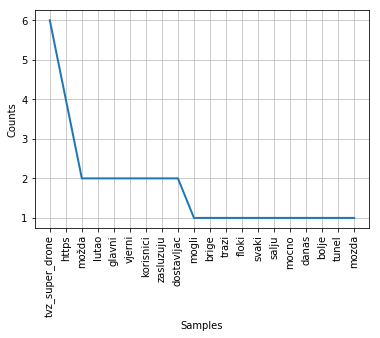


###############################################
Collection name: tweets.From_2017_01_08_To_2017_01_15
###############################################
<h3>Text mining 2017.01.08 - 2017.01.15</h3><br>
<b>Tokens: </b> {'paranoična', 'ključeve', 'ukrao', 'susjedu', 'mrzio', 'stvarčica', 'svakom', 'usbsindikatorommemorije', 'spriječila', 'odmah', 'stvari', 'izgubi', 'živaca', 'morat', 'staviti', 'djecu', 'trenutku', 'njemu', 'dolazi', 'kišobrana', 'novčanik', 'suradnju', 'vikend', 'svaki', 'nalaze', 'svoju', 'vojsci', 'gubiti', 'zasad', 'vojnike', 'lijepim', 'spasio', 'zahvaljujući', 'klasični', 'mnogih', 'domet', 'krađu', 'super', 'losekeys', 'uvijek', 'naljepnice', 'bojama', 'general', 'ekipi', 'shopping', 'dvorište', 'centru', 'jeste', 'vidim', 'dobar', 'djece', 'ništa', 'saznao', 'trebao', 'ukradenih', 'svoje', 'stickove', 'životinje', 'svima', 'vlasnika', 'dostupne', 'prekjučer', 'pratiti', 'tvz_mina', 'bivšeg', 'naručiti', 'tvz_nmasic', 'praćenje', 'hvala', 'kojim', 'bazen', 'komada'

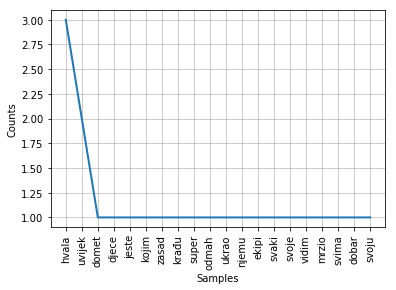


###############################################
Collection name: tweets.From_2017_02_15_To_2017_02_22
###############################################
<h3>Text mining 2017.02.15 - 2017.02.22</h3><br>
<b>Tokens: </b> set()

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 0

<b>Top 10 words</b>
<ul>
</ul>
<br>
<img src="Images/nltk_2017_02_15_To_2017_02_22.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches
<br><br>


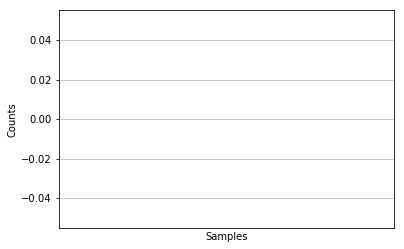


###############################################
Collection name: tweets.From_2017_01_15_To_2017_01_22
###############################################
<h3>Text mining 2017.01.15 - 2017.01.22</h3><br>
<b>Tokens: </b> {'svoga', 'slatke', 'moguca', 'uhvatim', 'računajte', 'dobro', 'miševa', 'floki', 'kućne', 'posvuda', 'stana', 'stvari', 'ugradimo', '//t.co/ckecqrw5dp', 'ajmooo^^', 'usbsindikatorommemorije', 'trebali', 'danas', 'odlutao', 'windows', 'coffeex', 'njega', 'bezuspješno', 'naravno', 'odlunja', 'ubojice', 'ptica', 'proizvodom', 'punicu', 'cijelo', 'uskoro', 'papagaja', 'raznju', 'domet', 'isprobavanju', 'losekeys', 'stari', '180kn', 'super', 'povećati', 'kapacitet', 'koliko', 'naljepnica', 'ideju', 'gradu', 'vidim', 'mobile', 'saznao', 'gubljenja', 'htjela', 'svoje', 'serijski', 'platio', '2004.', 'partneri', 'popiti', 'popodne', 'pratiti', 'tvz_mina', 'verzija', 'https', 'uzeti', 'dostupna', 'stick', 'hvala', 'godine', 'rezultirati', 'tražili', 'moram', 'zapravo', 'zlato', 'im

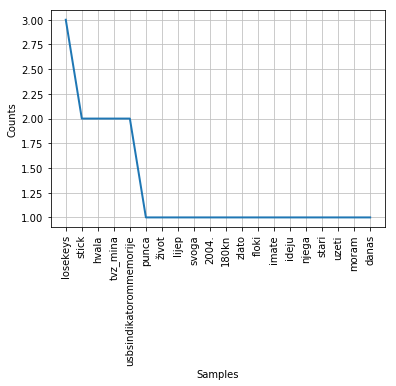


###############################################
Collection name: tweets.From_2016_12_30_To_2016_12_31
###############################################
<h3>Text mining 2016.12.30 - 2016.12.31</h3><br>
<b>Tokens: </b> set()

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 0

<b>Top 10 words</b>
<ul>
</ul>
<br>
<img src="Images/nltk_2016_12_30_To_2016_12_31.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches
<br><br>


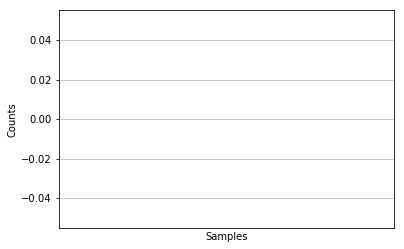


###############################################
Collection name: tweets.all
###############################################
<h3>Text mining all</h3><br>
<b>Tokens: </b> {'uređaj', 'susjedu', 'postaje', 'svakom', 'prijatelji', 'ugradimo', 'stvari', 'zakon', 'sigurnije', 'navigacija', 'punicu', 'raznju', 'dostavljac', 'losekeys', 'bolji', 'centru', 'trebao', 'budget', 'prosao', 'napijem', 'moram', 'e-mail', 'otkako', 'paranoična', 'navigaciji', 'sakrije', 'coffeex.javite', 'najavljuju', 'genijalno', 'kafiću', 'morat', 'mozda', 'prikačim', 'svoju', 'vojsci', 'konacno', 'mnogih', 'bojama', 'tvz_dpapes', 'salju', '2004.', 'zlato', 'tragajući', 'život', 'postali', 'pomoci', 'izgleda', 'svida', 'rješenu', 'dostave', 'cijelo', 'stari', 'glavni', 'naljepnica', 'lokaciju', 'brige', 'ništa', 'android', 'dostavu', 'krađe', 'nekako', 'stavim', 'odljepljuje', '//t.co/djytzirnac', 'izgubljenim', 'smotan', 'zaboravna', 'potrošio', 'slučaj', 'moguca', 'triangulacijom', 'rjesenje', 'kućne', 'odmah', 'a

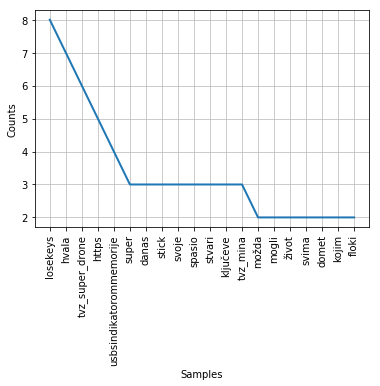


###############################################
Collection name: tweets.From_2017_01_29_To_2017_01_31
###############################################
<h3>Text mining 2017.01.29 - 2017.01.31</h3><br>
<b>Tokens: </b> {'kupio', 'izgleda', 'zamijeniti', 'ispravan..'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 3.3846153846153846

<b>Top 10 words</b>
<ul>
  <li>
     kupio : <b>1</b>
  </li>
  <li>
     izgleda : <b>1</b>
  </li>
  <li>
     ispravan.. : <b>1</b>
  </li>
  <li>
     zamijeniti : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_01_29_To_2017_01_31.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches
<br><br>


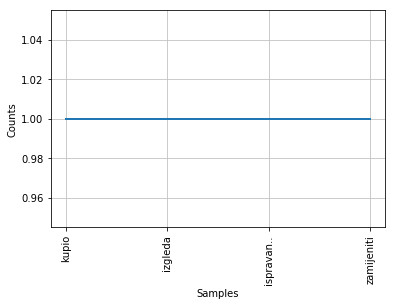


###############################################
Collection name: tweets.From_2016_12_23_To_2016_12_30
###############################################
<h3>Text mining 2016.12.23 - 2016.12.30</h3><br>
<b>Tokens: </b> {'stalno', 'patkice', 'bojama', 'kojim', 'dostupan', 'moram', 'zaštititi', 'odličan', 'nabavit', 'proizvod', 'svoje', 'stvari', 'krađe', 'bitne', 'gubio', 'trebaju'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 6.741935483870968

<b>Top 10 words</b>
<ul>
  <li>
     gubio : <b>1</b>
  </li>
  <li>
     bitne : <b>1</b>
  </li>
  <li>
     moram : <b>1</b>
  </li>
  <li>
     kojim : <b>1</b>
  </li>
  <li>
     svoje : <b>1</b>
  </li>
  <li>
     krađe : <b>1</b>
  </li>
  <li>
     stalno : <b>1</b>
  </li>
  <li>
     stvari : <b>1</b>
  </li>
  <li>
     bojama : <b>1</b>
  </li>
  <li>
     odličan : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2016_12_23_To_2016_12_30.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</

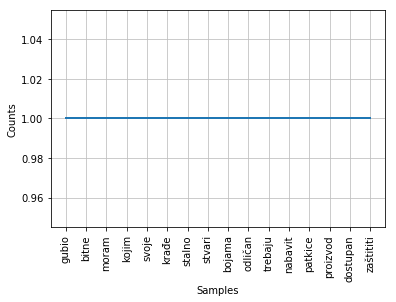


###############################################
Collection name: tweets.From_2017_01_22_To_2017_01_29
###############################################
<h3>Text mining 2017.01.22 - 2017.01.29</h3><br>
<b>Tokens: </b> {'putem', 'woohoo', 'rukavicama', 'zadovoljnu', 'uređaj', 'ispit', 'kišobranu', 'odgovor', 'treba', 'ucili', 'rješenu', 'polijepio', 'coffeex.javite', 'usbsindikatorommemorije', 'drago', 'prijedlog', 'toliko', 'prije', 'zaboravljam', 'javim', 'adresu', 'vrtlog', 'mogli', 'prikačim', 'naručujem', 'hvaliti', 'papagaja', 'dođem', 'poslat', 'konacno', 'stick2me.veliko', 'losekeys', 'super', 'poslovni', 'odbjeglog', 'isprobam', 'nađem', 'slučaju', 'ništa', 'dostavu', 'musteriju', 'prosao', 'javite', 'svima', 'oboje', 'hvala', 'napijem', 'ljubavnicu', 'coffeex.kad', 'jedan', 'e-mail', 'imate', 'locirao', 'izgubim', 'život', 'zalijepit', 'zaboravna'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 21.431818181818183

<b>Top 10 words</b>
<ul>
  <li>
     hvala : <b>2</b>

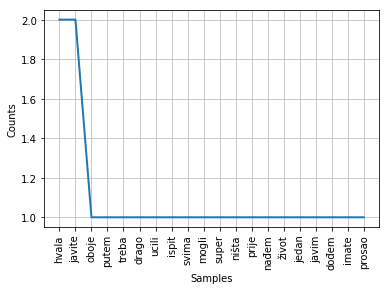


###############################################
Collection name: tweets.From_2017_02_22_To_2017_02_28
###############################################
<h3>Text mining 2017.02.22 - 2017.02.28</h3><br>
<b>Tokens: </b> set()

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 0

<b>Top 10 words</b>
<ul>
</ul>
<br>
<img src="Images/nltk_2017_02_22_To_2017_02_28.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches
<br><br>


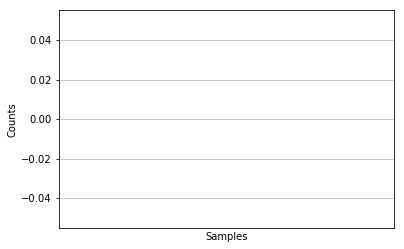


###############################################
Collection name: tweets.From_2017_01_01_To_2017_01_08
###############################################
<h3>Text mining 2017.01.01 - 2017.01.08</h3><br>
<b>Tokens: </b> {'ključeve', 'prijatelji', 'svida', 'trebalo', 'djecu', 'diraj', 'problemi', 'ostalo', 'specifičan', 'svoju', 'razlika', 'govore', 'losekeys', 'koliko', 'tvz_dpapes', 'između', 'istina', 'pomoću', 'nekako', 'tvz_nmasic', 'traje', 'pratio', 'odljepljuje', 'postoje', 'moralni', 'veliki', 'oduvijek', 'baterija'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 14.368421052631579

<b>Top 10 words</b>
<ul>
  <li>
     losekeys : <b>3</b>
  </li>
  <li>
     ključeve : <b>2</b>
  </li>
  <li>
     diraj : <b>1</b>
  </li>
  <li>
     traje : <b>1</b>
  </li>
  <li>
     svida : <b>1</b>
  </li>
  <li>
     svoju : <b>1</b>
  </li>
  <li>
     djecu : <b>1</b>
  </li>
  <li>
     veliki : <b>1</b>
  </li>
  <li>
     ostalo : <b>1</b>
  </li>
  <li>
     koliko : <b>1</b

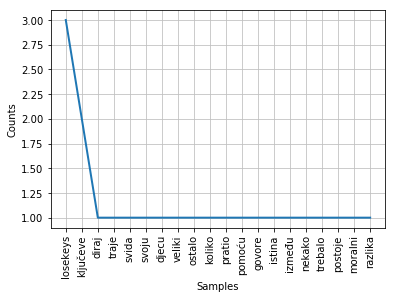


###############################################
Collection name: tweets.From_2017_02_08_To_2017_02_15
###############################################
<h3>Text mining 2017.02.08 - 2017.02.15</h3><br>
<b>Tokens: </b> {'otvoren', 'ostavio', 'srećom', 'locirana', 'novčanik', 'iskoristila', 'odlučila', 'prozor', 'skoro', 'napraviti', 'imala', 'kafiću', 'spasio', 'danas', 'papiga'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 6.75

<b>Top 10 words</b>
<ul>
  <li>
     imala : <b>1</b>
  </li>
  <li>
     danas : <b>1</b>
  </li>
  <li>
     skoro : <b>1</b>
  </li>
  <li>
     papiga : <b>1</b>
  </li>
  <li>
     prozor : <b>1</b>
  </li>
  <li>
     srećom : <b>1</b>
  </li>
  <li>
     spasio : <b>1</b>
  </li>
  <li>
     kafiću : <b>1</b>
  </li>
  <li>
     otvoren : <b>1</b>
  </li>
  <li>
     ostavio : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_02_08_To_2017_02_15.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No 

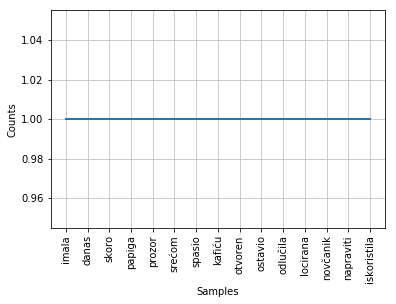


###############################################
Collection name: tweets.From_2017_02_08_To_2017_02_15
###############################################
Vertex1:TVZ_ac
Vertex2:TVZ_dkoscica

Vertex1:TVZ_Fit_at_Work
Vertex2:TVZ_dkoscica

<h3>SNA 2017.02.08 - 2017.02.15</h3><br>
<b>Number of nodes: </b>3
<br>
<b>Number of edges: </b>2
<br>
<b>Average degree: </b>  1.3333
<br>
<b>Degree histogram: </b>[0, 2, 1]
<br>
<b>Density: </b> 0.6666666666666666
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.5
<br>
TVZ_Fit_at_Work, 0.5
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.0
<br>
TVZ_Fit_at_Work, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.6666666666666666
<br>
TVZ_Fit_at_Work, 0.6666666666666666
<br><br>
<b>Sorted eigenvector</b>
<br>
<img src="Images/sna_2017_02_08_To_2017_02_15.png">


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 31 23:13:50 2017

@author: Dominik
"""

import sys
sys.path.append('Python/') 

from util import PrintHelper 
from tweepy_wrapper import TweepyWrapper
from pymongo_wrapper import PyMongoWrapper
from nltk_wrapper import NLTKWrapper
from sna_wrapper import SNAWrapper

import plotly.plotly as py
import plotly.graph_objs as go

import nltk
from time import sleep

def main():

    tweepyWrapper = TweepyWrapper()
    
    tweepyWrapper.print_user_information()
    
    tweepyWrapper.print_all_my_followers()
    tweepyWrapper.print_most_influential_followers()
    
    tweepyWrapper.print_all_tweets_from_me()
    tweepyWrapper.print_retweets_of_me()
    
    #allFollowerTweetsWhichContainStick2Me = tweepyWrapper.get_follower_tweets_which_contain_Stick2Me()
    #tweepyWrapper.print_all_tweets_which_contain_Stick2Me()

    pyMongoWrapper = PyMongoWrapper()
    #pyMongoWrapper.insert_all_tweets(allFollowerTweetsWhichContainStick2Me)   
    #pyMongoWrapper.print_all_collection_tweets()

    
    collectionNames = pyMongoWrapper.get_all_collection_names()
    
    """
    Basic data analytics
    """
    for collectionName in collectionNames:
        PrintHelper.print_header("Collection name: " + collectionName)
        pyMongoWrapper.print_collection(collectionName)

    """"
    NLTK
    """
    nltkWrapper = NLTKWrapper()
    
    #targetCollectionName = "tweets.From_2017_02_08_To_2017_02_15"
    for collectionName in collectionNames:
        PrintHelper.print_header("Collection name: " + collectionName)
        tweetTextSummaryFromCollection = pyMongoWrapper.get_tweet_text_summary_for_collection(collectionName)
        nltkWrapper.analize_text(collectionName, tweetTextSummaryFromCollection) 

    """
    SNA
    """
    targetCollectionName = "tweets.From_2017_02_08_To_2017_02_15"
    for collectionName in collectionNames:
        if collectionName in targetCollectionName:
            PrintHelper.print_header("Collection name: " + collectionName)
            vertexes = pyMongoWrapper.get_tweet_vertexes_for_collection(collectionName) 
            SNAWrapper(collectionName, vertexes).create_sna_analysis_html()
            #SNAWrapper(collectionName, vertexes).create_sna_analysis()
            break
           
if __name__ == "__main__": main()

<center><h1>Rezultati istraživanja</h1></center>


## Osnovne metrike

<ul> 
  <li>
      <p>Broj followera: <b>32</b></p>
  </li>
  <li>
      <p>Broj prijatelja: <b>33</b></p>
  </li>
  <li>
      <p>Broj favorita: <b>17</b></p>
  </li>
   <li>
      <p>Broj retweeta: <b>2</b></p>
  </li>
  <li>
      <p>Ukupni broj tweetova koji sadrže #Stick2Me: <b>121</b><br>Vlastiti: <b>58</b><br> Follower: <b>63</b></p>
  </li>
  <li>
      <p>Ukupni broj tweetova mojih followera: <b>2584</b></p>
  </li>
</ul>

<h3>Retweetovi</h3>
<ul> 
  <li>
   <b>Date:</b> 2017-02-05 16:25:54 <br>
   <b>Name:</b> #Stick2Me <br>
   <b>Screen name:</b> TVZ_dkoscica <br>
   <b>Text:</b> Od danas #tvz_super_drone postaje naš glavni dostavljac #Stick2Me paketa, nasi vjerni korisnici zasluzuju samo najb… https://t.co/6BqEEMQsel <br>
 </li>
 <br>
 <li>
   <b>Date:</b> 2017-01-15 23:53:18 <br>
   <b>Name:</b> #Stick2Me <br>
   <b>Screen name:</b> TVZ_dkoscica <br>
   <b>Text:</b> Uživanje u #Coffeex u 1h ujutro 😎 <br>
 </li>
</ul>

<h3>Top 10 followera po broju ukupnih tweetova</h3>
<ul> 
    <li>
       <b>Id:</b> 810550212859228160 <br>
       <b>Created at:</b> 2016-12-18 18:20:04 <br>
       <b>Name:</b> Pero Drone <br>
       <b>Screen name:</b> tvz_super_drone <br>
       <b>Description:</b> #tvz_super_drone - Super fast delivery drones - imagine and it's there. <br>
       <b>Followers count:</b> 34 <br>
       <b>Friends count:</b> 35 <br>
       <b>Favorites count:</b> 24 <br>
       <b>Statuses count:</b> 340 <br>
     </li>
     <br>
    <li>
       <b>Id:</b> 810530301395009537 <br>
       <b>Created at:</b> 2016-12-18 17:00:57 <br>
       <b>Name:</b> #Fit_at_Work <br>
       <b>Screen name:</b> TVZ_Fit_at_Work <br>
       <b>Description:</b> Iako sjedite, uz stolicu Fit@Work možete se aktivirati i na vrijeme smanjiti mogućnost pojave sjedilačkih bolesti. <br>
       <b>Followers count:</b> 34 <br>
       <b>Friends count:</b> 35 <br>
       <b>Favorites count:</b> 235 <br>
       <b>Statuses count:</b> 316 <br>
    </li>
    <br>
    <li>
       <b>Id:</b> 809881638968709120 <br>
       <b>Created at:</b> 2016-12-16 22:03:24 <br>
       <b>Name:</b> VR Services <br>
       <b>Screen name:</b> TVZ_VR <br>
       <b>Description:</b> ---account for educational purposes--- #tvzVR We are providing variety of VR services using all the latest innovations and VR gadgets. <br>
       <b>Followers count:</b> 41 <br>
       <b>Friends count:</b> 35 <br>
       <b>Favorites count:</b> 33 <br>
       <b>Statuses count:</b> 277 <br>
    </li>
    <br>
    <li>
       <b>Id:</b> 810454584539934722 <br>
       <b>Created at:</b> 2016-12-18 12:00:05 <br>
       <b>Name:</b> Emanuel Borić <br>
       <b>Screen name:</b> TVZ_boric <br>
       <b>Description:</b> UpsideDownTree - jedinstven način obilježavanja Božića. #upsideDownTree <br>
       <b>Followers count:</b> 34 <br>
       <b>Friends count:</b> 34 <br>
       <b>Favorites count:</b> 1 <br>
       <b>Statuses count:</b> 229 <br>
   </li>
   <br>
   <li>
       <b>Id:</b> 809091294094127104 <br>
       <b>Created at:</b> 2016-12-14 17:42:51 <br>
       <b>Name:</b> @TVZ_mpezo <br>
       <b>Screen name:</b> TVZ_mpezo <br>
       <b>Description:</b> Molim Vas da kad stavljate #SvijetlosniMacevi , hvala <br>
       <b>Followers count:</b> 34 <br>
       <b>Friends count:</b> 32 <br>
       <b>Favorites count:</b> 40 <br>
       <b>Statuses count:</b> 216 <br>
   </li>
   <br>
   <li>
       <b>Id:</b> 809806612638605312 <br>
       <b>Created at:</b> 2016-12-16 17:05:16 <br>
       <b>Name:</b> NikolaM #losekeys <br>
       <b>Screen name:</b> TVZ_nmasic <br>
       <b>Description:</b> Account napravljen za potrebe kolegija NoSQL i Big Data analitika, TVZ, 2016/2017. Svaka sličnost sa stvarnim proizvodima je slučajna. #losekeys <br>
       <b>Followers count:</b> 32 <br>
       <b>Friends count:</b> 31 <br>
       <b>Favorites count:</b> 67 <br>
       <b>Statuses count:</b> 203 <br>
   </li>
   <br>
   <li>
       <b>Id:</b> 813775557116694528 <br>
       <b>Created at:</b> 2016-12-27 15:56:26 <br>
       <b>Name:</b> Okrutna budilica <br>
       <b>Screen name:</b> TVZ_ojuric <br>
       <b>Description:</b> Link na prezentaciju https://t.co/a1kZUXdfwG <br>
       <b>Followers count:</b> 32 <br>
       <b>Friends count:</b> 35 <br>
       <b>Favorites count:</b> 5 <br>
       <b>Statuses count:</b> 194 <br>
   </li>
   <br>
   <li>
       <b>Id:</b> 810199514401427456 <br>
       <b>Created at:</b> 2016-12-17 19:06:31 <br>
       <b>Name:</b> VirtualKeyboard <br>
       <b>Screen name:</b> TVZ_ac <br>
       <b>Description:</b> #virtualkeyboard pretvara svaku ravnu površinu u QWERTY tipkovnicu <br>
       <b>Followers count:</b> 35 <br>
       <b>Friends count:</b> 33 <br>
       <b>Favorites count:</b> 50 <br>
       <b>Statuses count:</b> 169 <br>
   </li>
   <br>
   <li>
       <b>Id:</b> 809873781179162624 <br>
       <b>Created at:</b> 2016-12-16 21:32:10 <br>
       <b>Name:</b> Dolores Skugor <br>
       <b>Screen name:</b> TVZ_dolores <br>
       <b>Description:</b> #digitalnimarker 
Digitalni marker služi za ispisivanje na računalu teksta koji se prelazi po papiru. <br>
       <b>Followers count:</b> 35 <br>
       <b>Friends count:</b> 35 <br>
       <b>Favorites count:</b> 30 <br>
       <b>Statuses count:</b> 160 <br>
  </li>
  <br>
  <li>
       <b>Id:</b> 810582760284946432 <br>
       <b>Created at:</b> 2016-12-18 20:29:24 <br>
       <b>Name:</b> Univ. Prevoditelj <br>
       <b>Screen name:</b> TVZ_prevoditelj <br>
       <b>Description:</b> Komunikacija na bilo kojem službenom jeziku bez ikakvog predznanja? Samo uz #univerzalniprevoditelj <br>
       <b>Followers count:</b> 31 <br>
       <b>Friends count:</b> 33 <br>
       <b>Favorites count:</b> 22 <br>
       <b>Statuses count:</b> 153
   </li>  
</ul>
<h3>Top 10 followera koji su koristili #Stick2Me tag</h3>
<ul> 
  <li>Pero Drone <b>11</b></li>
  <li>Okrutna budilica <b>9</b></li>
  <li>NikolaM #losekeys <b>6</b></li>
  <li>Emanuel Borić <b>5</b></li>
  <li>Dolores Skugor <b>5</b></li>
  <li>#Fit_at_Work <b>4</b></li>
  <li>VirtualKeyboard <b>4</b></li>
  <li>NanotechServices <b>4</b></li>
  <li>Coffeex <b>3</b></li>
  <li>Univ. Prevoditelj <b>2</b></li>
</ul>

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

labels =  ['Pero Drone', 'Okrutna budilica', 'NikolaM #losekeys', 'Emanuel Borić', 'Dolores Skugor', 
'#Fit_at_Work', 'VirtualKeyboard', 'NanotechServices', 'Coffeex', 'Coffeex', 'Univ. Prevoditelj']
values = [11, 9, 6, 5, 5, 4, 4, 4, 3, 2]

fig = {
    'data': [{'labels': labels,
              'values': values,
              'type': 'pie'}],
    'layout': {'title': 'Top 10 followera koji su koristili #Stick2Me tag'}
     }

py.iplot(fig)

## Osnovne metrike pritoka podataka
<h3>Graf dinamike tjednih twit-ova</h3>

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['23.12.2016-31.12.2016', 
               '01.01.2017-08.01.2017',
               '08.01.2017-15.01.2017',
               '15.01.2017-22.01.2017',
               '22.01.2017-31.01.2017',
               '01.02.2017-08.02.2017',
               '08.02.2017-15.02.2017'
               '15.02.2017-22.02.2017'],
            y=[2, 7, 12, 14, 9, 16, 2, 0]
    )]

py.iplot(data, filename='basic-bar')

<h3>Osnovne metrike pritoka podataka 23.12.2016 – 31.12.2016 (2 tweeta)</h3>
<h3>Proizvod bilježi slab odaziv, trenutno je prepoznat od dva korisnika od kojih je jedan iznimno zadovoljan dok je drugi samo zainteresiran za proizvod.</h3>
<ul>
  <li>
    <b>Date:</b> 2016-12-28 14:38:14 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica #Stick2Me odličan proizvod. Stalno sam gubio bitne stvari baš kad mi trebaju, ovo si moram nabavit. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2016-12-27 18:11:47 <br>
    <b>Name:</b> Damir Šehić <br>
    <b>Screen name:</b> TVZ_patkice <br>
    <b>Text:</b> @TVZ_dkoscica U kojim bojama je #Stick2Me dostupan. Htio bih #zaštititi svoje #patkice od #krađe <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 01.01.2017 – 08.01.2017 (7 tweeta)</h3>
<h3>Stick2Me polako postaje prepoznat i odaziv se povećava. Isto tako pojavljuju se prve pritužbe na proizvoid kao i nedoumice.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-01-06 14:36:56 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dkoscica #Stick2Me, moj veliki brat #losekeys <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-06 14:30:42 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dpapes @TVZ_dkoscica #losekeys je specifičan samo za ključeve! #Stick2Me je za sve ostalo (ne diraj mi ključeve) :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-04 23:27:58 <br>
    <b>Name:</b> VirtualKeyboard <br>
    <b>Screen name:</b> TVZ_ac <br>
    <b>Text:</b> @TVZ_dkoscica Koliko traje baterija na #Stick2Me? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-03 12:22:05 <br>
    <b>Name:</b> Emanuel Borić <br>
    <b>Screen name:</b> TVZ_boric <br>
    <b>Text:</b> @TVZ_dkoscica svida mi se, to mi je oduvijek trebalo 😀 #Stick2me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-07 21:05:58 <br>
    <b>Name:</b> VR Services <br>
    <b>Screen name:</b> TVZ_VR <br>
    <b>Text:</b> @TVZ_dkoscica Pratio bih svoju djecu pomoću #Stick2Me ali prijatelji mi govore da tu postoje neki moralni problemi, da li je to istina? :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-02 17:03:54 <br>
    <b>Name:</b> NanotechServices <br>
    <b>Screen name:</b> TVZ_dpapes <br>
    <b>Text:</b> @TVZ_dkoscica @TVZ_nmasic Koja je razlika između #Stick2Me i #losekeys ? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-01 17:12:14 <br>
    <b>Name:</b> @TVZ_mpezo <br>
    <b>Screen name:</b> TVZ_mpezo <br>
    <b>Text:</b> @TVZ_dkoscica Nekako mi se brzo odljepljuje #stick2me <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 08.01.2017 – 15.01.2017 (12 tweeta)</h3>
<h3>Proizvod bilježi rast popularnosti, korisnici su uglavnom zadovoljni proizvodom no pojavljuju se i prve kritike na temelju dometa.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-01-08 23:59:21 <br>
    <b>Name:</b> Jasmina <br>
    <b>Screen name:</b> tvz_mina <br>
    <b>Text:</b> @TVZ_dkoscica 100m i nije neki domet za praćenje djece ili ukradenih stvari, no savršeno je doma za USB! Jeste li za suradnju? #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-08 22:56:47 <br>
    <b>Name:</b> WakeUp <br>
    <b>Screen name:</b> TVZ_dfodor <br>
    <b>Text:</b> @TVZ_dkoscica U kojim bojama su dostupne #Stick2Me naljepnice? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-09 16:37:35 <br>
    <b>Name:</b> Dolores Skugor <br>
    <b>Screen name:</b> TVZ_dolores <br>
    <b>Text:</b> @tvz_mina Da li nudite usb stickove na životinje ili su zasad samo oni klasični? #USBsIndikatoromMemorije <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-09 16:34:30 <br>
    <b>Name:</b> Dolores Skugor <br>
    <b>Screen name:</b> TVZ_dolores <br>
    <b>Text:</b> @TVZ_dkoscica Zahvaljujući #Stick2Me sam spriječila krađu svog kišobrana u shopping centru prošli vikend. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-12 23:56:12 <br>
    <b>Name:</b> VirtualKeyboard <br>
    <b>Screen name:</b> TVZ_ac <br>
    <b>Text:</b> @TVZ_dkoscica Super stvarčica, može odmah 10 komada #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-10 15:34:13 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Džepar mi je prekjučer ukrao novčanik, ali nije znao da u njemu imam #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-10 15:33:30 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Hvala puno ekipi iz #Stick2Me . Imam psa, izgubi se svaki malo na par dana - sad sam saznao da još uvijek voli bivšeg vlasnika <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-10 15:32:37 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Ja sam general u vojsci - u ratu koristim #Stick2Me  stavim ga na svoje vojnike pa ih vidim gdje se nalaze u svakom trenutku. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-10 15:31:41 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Mrzio sam iz dna duše gubiti ključeve , #Stick2Me me spasio mnogih živaca, hvala puno svima koji su ga razvili <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-10 15:30:54 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Dobar dan, ja sam paranoična mama , hvala na #Stick2Me  , lijepim ga na svoju djecu i sad uvijek znam gdje su. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-12 15:41:08 <br>
    <b>Name:</b> Emanuel Borić <br>
    <b>Screen name:</b> TVZ_boric <br>
    <b>Text:</b> @TVZ_dkoscica trebao bi staviti #Stick2Me na susjedu, sumnjam da mi dolazi u dvorište u bazen kad me nema, jel ju mogu kako pratiti? :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-09 16:08:35 <br>
    <b>Name:</b> NanotechServices <br>
    <b>Screen name:</b> TVZ_dpapes <br>
    <b>Text:</b> @TVZ_nmasic @TVZ_dkoscica A ništa onda, morat ću naručiti i #losekeys i #Stick2Me :) <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 15.01.2017 – 22.01.2017 (14 tweeta)</h3>
<h3>Popularnost proizvoda i dalje raste, korisnici su i dalje uglavnom zadovoljni proizvodom.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-01-15 09:44:18 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dkoscica #Stick2Me ugradimo na punicu, a #losekeys na punca! Život je lijep! :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-15 09:31:33 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dkoscica Naravno! Ajmooo^^ #losekeys #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-16 08:14:57 <br>
    <b>Name:</b> Coffeex <br>
    <b>Screen name:</b> Or_And_TVZ <br>
    <b>Text:</b> @TVZ_dkoscica Jer mogu pratiti svoga papagaja sa #Stick2Me?Voli popiti #Coffeex kavu pa leti posvuda kad ga lupi. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-15 18:07:00 <br>
    <b>Name:</b> Dolores Skugor <br>
    <b>Screen name:</b> TVZ_dolores <br>
    <b>Text:</b> @tvz_mina Imam stari stick od 4gb i htjela bi uzeti novi od 32 gb. Koliko moram nadoplatiti za novi #USBsIndikatoromMemorije? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-21 00:44:00 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @tvz_mina jel moguca zamjena za veci kapacitet #USBsIndikatoromMemorije? imam 16Mb stick iz 2004., platio sam ga 180kn ko suho zlato 😀 <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-20 19:37:06 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica 100 mu #Stick2Me naljepnica, Floki i jest pas lutalica! Imate li ideju kako da ja njega uhvatim kad on odlunja vise od 100m?🐕😢 <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-15 17:35:38 <br>
    <b>Name:</b> Dolores Skugor <br>
    <b>Screen name:</b> TVZ_dolores <br>
    <b>Text:</b> @TVZ_dkoscica Danas mi je zeko odlutao iz stana. Trebali bi povećati domet #Stick2Me jer smo ga cijelo popodne bezuspješno tražili. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-15 23:00:39 <br>
    <b>Name:</b> Univ. Prevoditelj <br>
    <b>Screen name:</b> TVZ_prevoditelj <br>
    <b>Text:</b> @TVZ_dkoscica Da li će uskoro biti dostupna i Windows Mobile verzija za #Stick2Me ? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-21 16:59:40 <br>
    <b>Name:</b> VirtualKeyboard <br>
    <b>Screen name:</b> TVZ_ac <br>
    <b>Text:</b> @TVZ_dkoscica Super, hvala! Veselim se isprobavanju #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-18 10:51:23 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Zbog #Stick2Me sam saznao da su slatke kućne mace zapravo serijski ubojice ptica i miševa u mom gradu kad ih ne vidim. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-16 10:20:50 <br>
    <b>Name:</b> Emanuel Borić <br>
    <b>Screen name:</b> TVZ_boric <br>
    <b>Text:</b> @TVZ_dkoscica dobro se drži za svoje 72 godine :) #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-15 01:50:19 <br>
    <b>Name:</b> VR Services <br>
    <b>Screen name:</b> TVZ_VR <br>
    <b>Text:</b> #Stick2Me #raznju Računajte i na mene https://t.co/CkEcQrw5DP <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-16 20:48:05 <br>
    <b>Name:</b> NanotechServices <br>
    <b>Screen name:</b> TVZ_dpapes <br>
    <b>Text:</b> @TVZ_dkoscica Konkurenti postali partneri. To može samo rezultirati boljim proizvodom. #Stick2Me #losekeys <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-18 18:43:35 <br>
    <b>Name:</b> @TVZ_mpezo <br>
    <b>Screen name:</b> TVZ_mpezo <br>
    <b>Text:</b> @TVZ_dkoscica nema više gubljenja stvari, hvala #Stick2Me <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 22.01.2017 – 31.01.2017 (9 tweeta)</h3>
<h3>Proizvod po prvi put bilježi znatan pad popularnosti među korisnicima, no i dalje su korisnici iznimno zadovoljni.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-01-25 20:45:13 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dkoscica Na ljubavnicu oboje! #losekeys #Stick2Me <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-25 23:06:16 <br>
    <b>Name:</b> Coffeex <br>
    <b>Screen name:</b> Or_And_TVZ <br>
    <b>Text:</b> @TVZ_dkoscica Konacno sam locirao odbjeglog papagaja putem #Stick2Me.Veliko hvala od #Coffeex.Kad god Vam treba kave samo javite :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-25 23:01:30 <br>
    <b>Name:</b> Coffeex <br>
    <b>Screen name:</b> Or_And_TVZ <br>
    <b>Text:</b> @TVZ_dkoscica Drago nam je da ste ucili ispit uz #Coffeex.Javite nam kako je prosao da bi svima mogli hvaliti #Stick2Me zadovoljnu musteriju <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-23 00:35:39 <br>
    <b>Name:</b> Jasmina <br>
    <b>Screen name:</b> tvz_mina <br>
    <b>Text:</b> @TVZ_dkoscica Super, poslat ćemo Vam poslovni prijedlog na Vašu e-mail adresu pa nam javite Vaš odgovor! #Stick2Me #USBsIndikatoromMemorije <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-26 21:02:12 <br>
    <b>Name:</b> Dolores Skugor <br>
    <b>Screen name:</b> TVZ_dolores <br>
    <b>Text:</b> @TVZ_dkoscica Toliko sam zaboravna ovih dana da ništa ne mogu naći... Naručujem 50 #Stick2Me i zalijepit ću ih na sve oko sebe. <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-24 09:51:20 <br>
    <b>Name:</b> Okrutna budilica <br>
    <b>Screen name:</b> TVZ_ojuric <br>
    <b>Text:</b> @TVZ_dkoscica Prije nego se napijem prikačim na sebe #Stick2Me tako da se nađem u slučaju ako se izgubim. Život je ludi vrtlog woohoo <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-24 09:28:39 <br>
    <b>Name:</b> Emanuel Borić <br>
    <b>Screen name:</b> TVZ_boric <br>
    <b>Text:</b> @TVZ_dkoscica može jedan #Stick2Me uređaj, javim Vam se kad ga isprobam:) hvala! Dođem do Vas ili imate dostavu rješenu? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-22 17:15:19 <br>
    <b>Name:</b> #Fit_at_Work <br>
    <b>Screen name:</b> TVZ_Fit_at_Work <br>
    <b>Text:</b> @TVZ_dkoscica #Stick2Me sam polijepio po rukavicama, kapi i kišobranu - sada ih više ne zaboravljam <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-01-29 00:04:46 <br>
    <b>Name:</b> tvzlovingdrone <br>
    <b>Screen name:</b> tvz_loving_dron <br>
    <b>Text:</b> @TVZ_dkoscica Kupio sam #Stick2Me i izgleda da nije ispravan.. Da li ga mogu zamijeniti? <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 01.02.2017 – 08.02.2017 (16 tweeta)</h3>
<h3>Proizvod bilježi znatan rast popularnosti. Glavni razlog tome je što je izdana nova verzija proizvoda koja ispravlja sve nedostatke i implementira sve suggestije koje su dali aktivni korisnici Stick2Me proizvoda.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-02-04 20:03:26 <br>
    <b>Name:</b> The Real Hoverboard <br>
    <b>Screen name:</b> TVZ_fvinkovic <br>
    <b>Text:</b> @TVZ_dkoscica Možda ga i osvojiš :) Možda bi mogli kupcima #therealhoverboard pokloniti i koji #Stick2Me za slučaj da pobjegne od nogu ;) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-04 20:56:40 <br>
    <b>Name:</b> Luka Mitak <br>
    <b>Screen name:</b> TVZ_FairyTale <br>
    <b>Text:</b> #Stick2Me je spasio moj mobitel i sa 100m, sa ovim unaprijeđenjem se osjećam samo još sigurnije. Keep up the good w… https://t.co/e3PlD1EpXm <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-06 18:25:45 <br>
    <b>Name:</b> NikolaM #losekeys <br>
    <b>Screen name:</b> TVZ_nmasic <br>
    <b>Text:</b> @TVZ_dkoscica Otkako sam ugradio #Stick2Me u kišobran moj budget se ustabilio! Smotan pa šta :) <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-07 19:53:02 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_ababic @TVZ_Fit_at_Work @TVZ_dkoscica #tvz_super_drone i #Stick2Me su partneri, vrlo smo fleksibilni tako da samo narucite bez brige 😀 <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-06 19:42:11 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica e to se trazi! Floki moj, sto si lutao lutao si, samo da znas da #Stick2Me ima rjesenje za svaki izazov! 🐕😉 <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-06 19:39:38 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica genijalno! navigacija triangulacijom stickera koji salju signal, mocno! #Stick2Me #TheFutureIsNow <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-06 08:30:32 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> RT @TVZ_dkoscica: Od danas #tvz_super_drone postaje naš glavni dostavljac #Stick2Me paketa, nasi vjerni korisnici zasluzuju samo najbolju d… <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-05 14:54:37 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> #tvz_super_drone i #Stick2Me najavljuju novu suradnju koja ce omoguciti razmjenu iskustava, konkurentnost i jos bol… https://t.co/WHZMQdAVac <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-05 12:17:08 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica Pozdravljamo prijedlog i otvaramo novo poglavlje jos bolje, brze i pouzdanije stick2Me dostave!… https://t.co/DJyTziRnaC <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-05 12:07:44 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica bit ce nam cast biti vas glavni dostavljac, nasi vjerni korisnici zasluzuju samo najbolje 😀 #tvz_super_drone za #Stick2Me! 🤝 <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-05 09:54:10 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica probao, kako ne, al frajer se sakrije u tunel i mos'ga slikat. Mozda bi #Stick2Me grid, stick svakih 100m pomogao za lokaciju? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-04 15:28:26 <br>
    <b>Name:</b> Pero Drone <br>
    <b>Screen name:</b> tvz_super_drone <br>
    <b>Text:</b> @TVZ_dkoscica mogu li #Stick2Me pomoci u navigaciji prostorom? zanima me dal bi se mogao kretati ko Daredevil ako ima vise tih naljepnica <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-04 21:01:54 <br>
    <b>Name:</b> Univ. Prevoditelj <br>
    <b>Screen name:</b> TVZ_prevoditelj <br>
    <b>Text:</b> @TVZ_dkoscica Samo radi #Stick2Me sam zamijenio svoj Windows Mobile za Android. Ne poznam više pojam izgubiti. Odličan proizvod! <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-02 14:26:30 <br>
    <b>Name:</b> Emanuel Borić <br>
    <b>Screen name:</b> TVZ_boric <br>
    <b>Text:</b> @TVZ_dkoscica može se kupiti samo jedan #Stick2Me uređaj ili se kupuje kao paket? <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-06 19:47:35 <br>
    <b>Name:</b> #Fit_at_Work <br>
    <b>Screen name:</b> TVZ_Fit_at_Work <br>
    <b>Text:</b> @TVZ_dkoscica @tvz_super_drone wow, ovo je bilo brzo #Stick2Me #tvz_super_drone <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-04 21:45:49 <br>
    <b>Name:</b> #Fit_at_Work <br>
    <b>Screen name:</b> TVZ_Fit_at_Work <br>
    <b>Text:</b> #Stick2Me je postao još bolji! Bacite oko, topla preporuka :) https://t.co/D4EsAin1ge <br>
  </li>
  <br>
</ul>

<h3>Osnovne metrike pritoka podataka 01.08.2017 – 15.02.2017 (2 tweeta)</h3>
<h3>Popularnost proizvodu je trenutno na najnižoj vrijednosti. Nema novih korisnika, stalni korisnici više nisu aktivini nakon prošlog tjedna no i dalje su korisnici zadovoljni proizvodom.</h3>
<ul>
  <li>
    <b>Date:</b> 2017-02-09 09:29:44 <br>
    <b>Name:</b> VirtualKeyboard <br>
    <b>Screen name:</b> TVZ_ac <br>
    <b>Text:</b> @TVZ_dkoscica Neki dan mi je papiga iskoristila otvoren prozor i odlučila napraviti đir, srećom pa je imala  #Stick2Me pa je brzo locirana <br>
  </li>
  <br>
  <li>
    <b>Date:</b> 2017-02-13 08:48:12 <br>
    <b>Name:</b> #Fit_at_Work <br>
    <b>Screen name:</b> TVZ_Fit_at_Work <br>
    <b>Text:</b> @TVZ_dkoscica #Stick2Me me spasio danas - skoro sam ostavio novčanik u kafiću. <br>
  </li>
  <br>
</ul>

## Osnovne metrike pritoka podataka - Zaključak

Proizvoid na početku nije bio prepoznat, zanemariv broj korisnika je bio zainteresiran za sam proizvod. Većina korisnika je na početku bila skeptična prema proizvodu. Tijekom vremena popularnost proizvoda sve više raste, čime raste i zadovoljstvo korisnika samim proizvodom. Tu i tamo se pojave kritike u vezi kvalitete izrade samog proizvoda no konačnici taj broj je zanemariv. Proizvod svoj maksimum popularnosti i zadovoljstva korisnika postiže u tjednu između 01.02.2017 - 08.02.2017. Naime u tom periodu je predstavljena nova verzija proizvoda sa svim ispravcima te implementiranim suggestijama sa strane postojećih i potencijalnih korisnika. Nakon toga popularnost proizvoda znatno opada no korisnici koji koriste proizvod su i dalje zadovoljni samim proizvodom.


## Text mining
<h3>Text mining 2016.12.23 - 2016.12.30</h3><br>
<b>Tokens: </b> {'bitne', 'moram', 'gubio', 'stvari', 'kojim', 'odličan', 'zaštititi', 'svoje', 'nabavit', 'patkice', 'stalno', 'bojama', 'proizvod', 'dostupan', 'krađe', 'trebaju'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 6.741935483870968

<b>Top 10 words</b>
<ul>
  <li>
     gubio : <b>1</b>
  </li>
  <li>
     bitne : <b>1</b>
  </li>
  <li>
     moram : <b>1</b>
  </li>
  <li>
     kojim : <b>1</b>
  </li>
  <li>
     svoje : <b>1</b>
  </li>
  <li>
     krađe : <b>1</b>
  </li>
  <li>
     stalno : <b>1</b>
  </li>
  <li>
     stvari : <b>1</b>
  </li>
  <li>
     bojama : <b>1</b>
  </li>
  <li>
     odličan : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2016_12_23_To_2016_12_30.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
Displaying 1 of 1 matches:
               stalno stvari bojama odličan trebaju nabavit patkice proizvod do
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining 2017.01.01 - 2017.01.08</h3><br>
<b>Tokens: </b> {'svoju', 'baterija', 'koliko', 'oduvijek', 'između', 'moralni', 'govore', 'tvz_nmasic', 'problemi', 'diraj', 'pomoću', 'djecu', 'razlika', 'postoje', 'trebalo', 'losekeys', 'ključeve', 'veliki', 'traje', 'pratio', 'svida', 'odljepljuje', 'tvz_dpapes', 'prijatelji', 'specifičan', 'istina', 'nekako', 'ostalo'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 14.368421052631579

<b>Top 10 words</b>
<ul>
  <li>
     losekeys : <b>3</b>
  </li>
  <li>
     ključeve : <b>2</b>
  </li>
  <li>
     diraj : <b>1</b>
  </li>
  <li>
     traje : <b>1</b>
  </li>
  <li>
     svida : <b>1</b>
  </li>
  <li>
     svoju : <b>1</b>
  </li>
  <li>
     djecu : <b>1</b>
  </li>
  <li>
     veliki : <b>1</b>
  </li>
  <li>
     ostalo : <b>1</b>
  </li>
  <li>
     koliko : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_01_01_To_2017_01_08.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining 2017.01.15 - 2017.01.22</h3><br>
<b>Tokens: </b> {'moram', 'zlato', 'ubojice', 'papagaja', 'rezultirati', 'super', 'moguca', 'koliko', 'njega', 'godine', 'hvala', 'miševa', 'domet', '2004.', 'uhvatim', 'postali', 'htjela', 'usbsindikatorommemorije', 'https', 'gradu', 'imate', 'windows', 'bezuspješno', 'stvari', 'danas', 'posvuda', 'mobile', 'popiti', 'kućne', 'život', 'stick', 'stari', 'losekeys', 'cijelo', 'ajmooo^^', 'isprobavanju', '//t.co/ckecqrw5dp', 'ideju', 'svoga', 'naravno', 'dostupna', 'tražili', 'gubljenja', 'proizvodom', 'vidim', 'uzeti', 'zamjena', 'stana', 'floki', 'boljim', 'saznao', 'svoje', 'odlutao', 'pratiti', 'tvz_mina', 'lijep', 'raznju', 'zapravo', 'veselim', 'popodne', 'kapacitet', 'punca', 'punicu', '180kn', 'coffeex', 'odlunja', 'ptica', 'naljepnica', 'konkurenti', 'slatke', 'platio', 'računajte', 'verzija', 'nadoplatiti', 'uskoro', 'lutalica', 'povećati', 'ugradimo', 'trebali', 'partneri', 'dobro', 'serijski'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 24.75925925925926

<b>Top 10 words</b>
<ul>
  <li>
     losekeys : <b>3</b>
  </li>
  <li>
     stick : <b>2</b>
  </li>
  <li>
     hvala : <b>2</b>
  </li>
  <li>
     tvz_mina : <b>2</b>
  </li>
  <li>
     usbsindikatorommemorije : <b>2</b>
  </li>
  <li>
     punca : <b>1</b>
  </li>
  <li>
     život : <b>1</b>
  </li>
  <li>
     lijep : <b>1</b>
  </li>
  <li>
     svoga : <b>1</b>
  </li>
  <li>
     2004 : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_01_15_To_2017_01_22.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
Displaying 1 of 1 matches:
 stick uzeti moram danas stana domet super hvala kućne ptica gradu vidim dobro 
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining 2017.01.22 - 2017.01.31</h3><br>
<b>Tokens: </b> {'papagaja', 'rješenu', 'super', 'adresu', 'coffeex.kad', 'drago', 'hvala', 'mogli', 'odgovor', 'konacno', 'usbsindikatorommemorije', 'isprobam', 'oboje', 'imate', 'vrtlog', 'zalijepit', 'putem', 'treba', 'hvaliti', 'napijem', 'javim', 'prosao', 'prijedlog', 'coffeex.javite', 'život', 'poslovni', 'stick2me.veliko', 'rukavicama', 'toliko', 'svima', 'ništa', 'jedan', 'dođem', 'zaboravna', 'zaboravljam', 'poslat', 'losekeys', 'javite', 'locirao', 'dostavu', 'ljubavnicu', 'slučaju', 'musteriju', 'zadovoljnu', 'kišobranu', 'e-mail', 'ucili', 'polijepio', 'nađem', 'izgubim', 'prije', 'naručujem', 'uređaj', 'prikačim', 'odbjeglog', 'woohoo', 'ispit'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 21.431818181818183

<b>Top 10 words</b>
<ul>
  <li>
     hvala : <b>2</b>
  </li>
  <li>
     javite : <b>2</b>
  </li>
  <li>
     oboje : <b>1</b>
  </li>
  <li>
     putem : <b>1</b>
  </li>
  <li>
     treba : <b>1</b>
  </li>
  <li>
     drago : <b>1</b>
  </li>
  <li>
     ucili : <b>1</b>
  </li>
  <li>
     ispit : <b>1</b>
  </li>
  <li>
     svima : <b>1</b>
  </li>
  <li>
     mogli : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_01_22_To_2017_01_29.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
Displaying 1 of 1 matches:
                                     super ništa prije nađem život jedan javim 
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining 2017.02.01 - 2017.02.08</h3><br>
<b>Tokens: </b> {'omoguciti', '//t.co/whzmqdavac', 'ustabilio', 'stickera', 'otkako', 'trazi', 'danas', 'možda', '//t.co/e3pld1epxm', 'sigurnije', 'daredevil', 'postaje', 'jedan', 'mogao', 'kupcima', 'osjećam', 'thefutureisnowrt', 'najbolju', 'pomoci', 'najbolje', 'kretati', 'ugradio', 'zasluzuju', '//t.co/d4esain1ge', 'tvz_fit_at_work', 'konkurentnost', 'mobitel', 'poglavlje', 'pobjegne', 'prostorom', 'pouzdanije', 'korisnici', 'lutao', 'iskustava', 'dostave', 'mogli', 'paket', 'windows', 'therealhoverboard', 'triangulacijom', 'salju', 'prijedlog', 'frajer', 'signal', 'najavljuju', 'bolje', 'fleksibilni', 'izazov', 'narucite', 'slučaj', 'mozda', 'naljepnica', 'zamijenio', 'tunel', 'navigacija', 'android', 'brige', 'vjerni', 'pomogao', 'pozdravljamo', 'unaprijeđenjem', 'zanima', 'glavni', 'topla', 'slikat', 'lokaciju', 'dostavljac', 'otvaramo', 'preporuka', 'spasio', 'floki', 'poznam', 'kišobran', 'svakih', 'tvz_ababic', 'paketa', 'mocno', 'odličan', 'bacite', 'postao', 'osvojiš', 'pokloniti', 'proizvod', 'kupiti', "mos'ga", 'sakrije', 'https', 'mobile', 'stick', 'navigaciji', 'probao', 'razmjenu', 'smotan', 'budget', 'svaki', 'kupuje', 'tvz_super_drone', 'rjesenje', 'bolji', 'uređaj', '//t.co/djytzirnac', 'pojam', 'partneri', 'izgubiti', 'suradnju', 'genijalno'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 36.01851851851852

<b>Top 10 words</b>
<ul>
  <li>
     tvz_super_drone : <b>6</b>
  </li>
  <li>
     https : <b>4</b>
  </li>
  <li>
     možda : <b>2</b>
  </li>
  <li>
     lutao : <b>2</b>
  </li>
  <li>
     glavni : <b>2</b>
  </li>
  <li>
     vjerni : <b>2</b>
  </li>
  <li>
     korisnici : <b>2</b>
  </li>
  <li>
     zasluzuju : <b>2</b>
  </li>
  <li>
     dostavljac : <b>2</b>
  </li>
  <li>
     mogli : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_02_01_To_2017_02_08.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
Displaying 1 of 1 matches:
ije pomogao kretati windows android odličan pobjegne kišobran partneri narucite
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining 2017.02.08 - 2017.02.15</h3><br>
<b>Tokens: </b> {'danas', 'spasio', 'srećom', 'imala', 'papiga', 'kafiću', 'odlučila', 'iskoristila', 'ostavio', 'locirana', 'novčanik', 'otvoren', 'napraviti', 'prozor', 'skoro'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 6.75

<b>Top 10 words</b>
<ul>
  <li>
     imala : <b>1</b>
  </li>
  <li>
     danas : <b>1</b>
  </li>
  <li>
     skoro : <b>1</b>
  </li>
  <li>
     papiga : <b>1</b>
  </li>
  <li>
     prozor : <b>1</b>
  </li>
  <li>
     srećom : <b>1</b>
  </li>
  <li>
     spasio : <b>1</b>
  </li>
  <li>
     kafiću : <b>1</b>
  </li>
  <li>
     otvoren : <b>1</b>
  </li>
  <li>
     ostavio : <b>1</b>
  </li>
</ul>
<br>
<img src="Images/nltk_2017_02_08_To_2017_02_15.png">
Concordance: <b>dobar</b>
<br>
No matches
<br><br>
Concordance: <b>odličan</b>
<br>
No matches
<br><br>
Concordance: <b>super</b>
<br>
No matches
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

<h3>Text mining objedinjeno</h3><br>
<b>Tokens: </b> {'rješenu', 'njega', '//t.co/whzmqdavac', 'ustabilio', 'otkako', 'životinje', 'razlika', 'stari', 'sigurnije', 'toliko', 'daredevil', 'tražili', 'prekjučer', 'ukradenih', 'stvar', 'stavim', 'general', 'uskoro', 'trebali', 'bazen', 'zalijepit', 'pouzdanije', 'lutao', 'dostave', 'paket', 'hvaliti', 'triangulacijom', 'papiga', 'signal', 'cijelo', 'zaboravljam', 'fleksibilni', 'odlutao', 'tvz_mina', 'vikend', 'ptica', 'zamijenio', 'tvz_dpapes', 'naručiti', 'prijatelji', 'istina', 'prošli', 'zamijeniti', 'sumnjam', 'moram', 'moguca', 'unaprijeđenjem', 'isprobam', 'putem', 'zakon', 'kafiću', 'živaca', 'zamjena', 'ključeve', 'džepar', 'poznam', 'dostupan', 'razvili', 'izgubi', 'miševa', 'sakrije', 'htjela', 'oboje', 'djecu', 'razmjenu', 'dobar', 'proizvodom', 'trebaju', 'vlasnika', 'svida', 'kišobranu', 'tvz_super_drone', 'bolji', 'koristim', 'uređaj', '//t.co/djytzirnac', 'suradnju', 'dobro', 'zahvaljujući', 'ostalo', 'zlato', 'omoguciti', 'odgovor', 'uštedio', 'poslovni', 'svima', 'naravno', 'mogao', 'najbolju', 'stana', 'zapravo', 'veselim', 'traje', 'punca', 'lijepim', 'računajte', 'gubiti', 'morat', 'rezultirati', 'moralni', 'postali', '2004.', 'therealhoverboard', 'stvari', 'prijedlog', '//t.co/ckecqrw5dp', 'jeste', 'bolje', 'slučaj', 'popodne', 'odlunja', 'naljepnica', 'tunel', 'lutalica', 'zasad', 'woohoo', 'krađe', 'praćenje', 'vojnike', 'zanima', 'usbsindikatorommemorije', 'stickove', 'imate', 'glavni', 'treba', 'posvuda', 'javim', 'rukavicama', 'preporuka', 'dostupna', 'tvz_ababic', 'mocno', 'coffeex', 'musteriju', 'nalaze', 'odličan', 'nadoplatiti', 'prikačim', 'postao', 'novčanik', 'ubojice', 'mnogih', 'imala', 'tvz_nmasic', 'kupio', 'domet', "mos'ga", 'https', 'stick', 'navigaciji', 'izgleda', 'trebalo', 'spriječila', 'javite', 'budget', 'svaki', 'zadovoljnu', 'e-mail', 'konkurenti', 'slatke', 'polijepio', 'izgubim', 'partneri', 'izgubiti', 'tragajući', 'svoju', 'svakom', 'konacno', 'diraj', 'napijem', 'možda', 'njemu', 'naljepnice', 'postaje', 'otvoren', 'thefutureisnowrt', 'gubljenja', 'pomoci', 'najbolje', 'kretati', 'lijep', 'ugradio', 'zasluzuju', 'konkurentnost', 'platio', 'prije', 'poglavlje', 'nekako', 'izgubljenim', 'prostorom', 'kišobrana', 'koliko', 'godine', 'između', 'nabavit', 'mogli', 'vrtlog', 'windows', 'salju', 'kućne', 'ideju', 'svoga', 'savršeno', 'boljim', 'narucite', 'veliki', '180kn', 'ucili', 'android', 'odlučila', 'bojama', 'vjerni', 'papagaja', 'pomogao', 'problemi', 'bitne', 'kojim', 'slikat', 'isprobavanju', 'vidim', 'spasio', 'trebao', 'locirana', 'prozor', 'bacite', 'ispravan..', 'ugradimo', 'ekipi', 'pokloniti', 'shopping', 'napraviti', 'pomoću', 'trenutku', 'ništa', 'dolazi', 'poslat', 'losekeys', 'locirao', 'kapacitet', 'svoje', 'paranoična', 'odbjeglog', 'mozda', 'dvorište', 'drago', 'govore', 'stickera', 'komada', 'dostupne', 'gradu', 'trazi', 'danas', 'staviti', 'popiti', '//t.co/e3pld1epxm', 'ukrao', 'jedan', 'dođem', 'kupcima', 'osjećam', 'skoro', 'uzeti', 'ljubavnicu', '//t.co/d4esain1ge', 'tvz_fit_at_work', 'inače', 'mobitel', 'pobjegne', 'ostavio', 'odljepljuje', 'korisnici', 'mrzio', 'adresu', 'iskustava', 'oduvijek', 'stalno', 'odmah', 'coffeex.javite', 'život', 'frajer', 'ajmooo^^', 'najavljuju', 'izazov', 'saznao', 'dostavu', 'pratiti', 'raznju', 'patkice', 'vremena', 'gubio', 'navigacija', 'naručujem', 'verzija', 'brige', 'vojsci', 'punicu', 'baterija', 'pozdravljamo', 'coffeex.kad', 'hvala', 'klasični', 'bezuspješno', 'stick2me.veliko', 'topla', 'postoje', 'lokaciju', 'dostavljac', 'otvaramo', 'potrošio', 'floki', 'kišobran', 'svakih', 'uvijek', 'paketa', 'susjedu', 'centru', 'bivšeg', 'nudite', 'nađem', 'srećom', 'djece', 'osvojiš', 'serijski', 'specifičan', 'ispit', 'proizvod', 'super', 'stvarčica', 'kupiti', 'uhvatim', 'zaštititi', 'mobile', 'prosao', 'probao', 'iskoristila', 'zaboravna', 'smotan', 'pratio', 'kupuje', 'slučaju', 'krađu', 'rjesenje', 'povećati', 'pojam', 'genijalno'}

<b>Collocations: </b> None
<br><b>Lexical diversity: </b> 108.30645161290323

<b>Top 10 words</b>
<ul>
  <li>
     losekeys : <b>8</b>
  </li>
  <li>
     hvala : <b>7</b>
  </li>
  <li>
     tvz_super_drone : <b>6</b>
  </li>
  <li>
     https : <b>5</b>
  </li>
  <li>
     usbsindikatorommemorije : <b>4</b>
  </li>
  <li>
     super : <b>3</b>
  </li>
  <li>
     danas : <b>3</b>
  </li>
  <li>
     stick : <b>3</b>
  </li>
  <li>
     svoje : <b>3</b>
  </li>
  <li>
     spasio : <b>3</b>
  </li>
</ul>
<img src="Images/nltk_tweets_all.png">
<br>
Concordance: <b>dobar</b>
<br>
Displaying 1 of 1 matches:
 svaki svoje vidim mrzio hvala svima dobar hvala svoju djecu gubio bitne moram 
<br><br>
Concordance: <b>odličan</b>
<br>
Displaying 2 of 2 matches:
ali popodne tražili windows android odličan windows verzija otvoren veselim ušt
ice general vojnike razvili lijepim odličan trebaju nabavit patkice dostavu rje
<br><br>
Concordance: <b>super</b>
<br>
Displaying 3 of 3 matches:
                                     super domet djece jeste kojim brige trazi 
 stana domet zasad krađu pojam imala super hvala super odmah traje zakon stvar 
 zasad krađu pojam imala super hvala super odmah traje zakon stvar inače prije 
<br><br>
Concordance: <b>loš</b>
<br>
No matches
<br><br>
Concordance: <b>neispravan</b>
<br>
No matches

## Text mining - Zaključak

Dobiveni rezultati text mininga nisu pridonjeli analazi naime problem je u tome što je raspon različitih tokena prevelik te se na temelju tokena i bigrama teško da zaključiti što konkretno korisnici misle o samom  proizvodu. Također slaba pojava Concordance za riječi "dobar, odličan, super, loš, neispravan" ne omogućuje bolji uvid u konkretnom mišljenju koji imaju korisnici o Stick2Me proizvodu. Ono što se lako može zaključiti je to da korisnici često povezuju Stick2Me sa njihovim poslovnim partnerom losekeys.

## SNA 

<h3>SNA 2016.12.23 - 2016.12.30</h3><br>
<b>Number of nodes: </b>3
<br>
<b>Number of edges: </b>2
<br>
<b>Average degree: </b>  1.3333
<br>
<b>Degree histogram: </b>[0, 2, 1]
<br>
<b>Density: </b> 0.6666666666666666
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ojuric, 0.5
<br>
TVZ_patkice, 0.5
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ojuric, 0.0
<br>
TVZ_patkice, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ojuric, 0.6666666666666666
<br>
TVZ_patkice, 0.6666666666666666
<br><br>
<img src="Images/sna_2016_12_23_To_2016_12_30.png">

<h3>SNA 2017.01.01 - 2017.01.08</h3><br>
<b>Number of nodes: </b>7
<br>
<b>Number of edges: </b>7
<br>
<b>Average degree: </b>  2.0000
<br>
<b>Degree histogram: </b>[0, 4, 2, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.3333333333333333
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_nmasic, 0.3333333333333333
<br>
TVZ_dpapes, 0.3333333333333333
<br>
TVZ_ac, 0.16666666666666666
<br>
TVZ_boric, 0.16666666666666666
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 0.9333333333333333
<br>
TVZ_nmasic, 0.0
<br>
TVZ_dpapes, 0.0
<br>
TVZ_ac, 0.0
<br>
TVZ_boric, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_nmasic, 0.6
<br>
TVZ_dpapes, 0.6
<br>
TVZ_ac, 0.5454545454545454
<br>
TVZ_boric, 0.5454545454545454
<br><br>
<b>Sorted eigenvector</b>
<br>
TVZ_dkoscica, 0.6646218475240555
<br>
TVZ_nmasic, 0.3952959917755561
<br>
TVZ_dpapes, 0.3952959917755561
<br>
TVZ_ac, 0.24787091275806744
<br>
TVZ_boric, 0.24787091275806744
<br>
<img src="Images/sna_2017_01_01_To_2017_01_08.png">

<h3>SNA 2017.01.08 - 2017.01.15</h3><br>
<b>Number of nodes: </b>9
<br>
<b>Number of edges: </b>8
<br>
<b>Average degree: </b>  1.7778
<br>
<b>Degree histogram: </b>[0, 6, 2, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.2222222222222222
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 0.75
<br>
tvz_mina, 0.25
<br>
TVZ_dolores, 0.25
<br>
TVZ_dfodor, 0.125
<br>
TVZ_ac, 0.125
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 0.5
<br>
tvz_mina, 0.0
<br>
TVZ_dfodor, 0.0
<br>
TVZ_dolores, 0.0
<br>
TVZ_ac, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 0.75
<br>
tvz_mina, 0.44999999999999996
<br>
TVZ_dolores, 0.44999999999999996
<br>
TVZ_dfodor, 0.40909090909090906
<br>
TVZ_ac, 0.40909090909090906
<br><br>
<b>Sorted eigenvector</b>
<br>
TVZ_dkoscica, 0.6646215353341897
<br>
tvz_mina, 0.39529608571193514
<br>
TVZ_dolores, 0.39529608571193514
<br>
TVZ_dfodor, 0.24787104712514793
<br>
TVZ_ac, 0.24787104712514793
<br>
<img src="Images/sna_2017_01_08_To_2017_01_15.png">

<h3>SNA 2017.01.15 - 2017.01.22</h3><br>
<b>Number of nodes: </b>12
<br>
<b>Number of edges: </b>12
<br>
<b>Average degree: </b>  2.0000
<br>
<b>Degree histogram: </b>[0, 8, 3, 0, 0, 0, 0, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.18181818181818182
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 0.9090909090909092
<br>
tvz_super_drone, 0.18181818181818182
<br>
tvz_mina, 0.18181818181818182
<br>
TVZ_dolores, 0.18181818181818182
<br>
TVZ_nmasic, 0.09090909090909091
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 0.9545454545454545
<br>
tvz_super_drone, 0.08181818181818182
<br>
TVZ_dolores, 0.08181818181818182
<br>
tvz_mina, 0.00909090909090909
<br>
TVZ_nmasic, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 0.9166666666666666
<br>
tvz_super_drone, 0.55
<br>
TVZ_dolores, 0.55
<br>
TVZ_nmasic, 0.5
<br>
Or_And_TVZ, 0.5
<br><br>
<img src="Images/sna_2017_01_15_To_2017_01_22.png">

<h3>SNA 2017.01.22 - 2017.01.31</h3><br>
<b>Number of nodes: </b>8
<br>
<b>Number of edges: </b>7
<br>
<b>Average degree: </b>  1.7500
<br>
<b>Degree histogram: </b>[0, 7, 0, 0, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.25
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_nmasic, 0.14285714285714285
<br>
Or_And_TVZ, 0.14285714285714285
<br>
tvz_mina, 0.14285714285714285
<br>
TVZ_dolores, 0.14285714285714285
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_nmasic, 0.0
<br>
Or_And_TVZ, 0.0
<br>
tvz_mina, 0.0
<br>
TVZ_dolores, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_nmasic, 0.5384615384615384
<br>
Or_And_TVZ, 0.5384615384615384
<br>
tvz_mina, 0.5384615384615384
<br>
TVZ_dolores, 0.5384615384615384
<br><br>
<img src="Images/sna_2017_01_22_To_2017_01_29.png">

<h3>SNA 2017.02.01 - 2017.02.08</h3><br>
<b>Number of nodes: </b>8
<br>
<b>Number of edges: </b>7
<br>
<b>Average degree: </b>  1.7500
<br>
<b>Degree histogram: </b>[0, 6, 1, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.25
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 0.8571428571428571
<br>
tvz_super_drone, 0.2857142857142857
<br>
TVZ_fvinkovic, 0.14285714285714285
<br>
TVZ_nmasic, 0.14285714285714285
<br>
TVZ_ababic, 0.14285714285714285
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 0.9523809523809523
<br>
tvz_super_drone, 0.2857142857142857
<br>
TVZ_fvinkovic, 0.0
<br>
TVZ_nmasic, 0.0
<br>
TVZ_ababic, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 0.875
<br>
tvz_super_drone, 0.5833333333333334
<br>
TVZ_fvinkovic, 0.5
<br>
TVZ_nmasic, 0.5
<br>
TVZ_prevoditelj, 0.5
<br>
<br>
<img src="Images/sna_2017_02_01_To_2017_02_08.png">

<h3>SNA 2017.02.08 - 2017.02.15</h3><br>
<b>Number of nodes: </b>3
<br>
<b>Number of edges: </b>2
<br>
<b>Average degree: </b>  1.3333
<br>
<b>Degree histogram: </b>[0, 2, 1]
<br>
<b>Density: </b> 0.6666666666666666
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.5
<br>
TVZ_Fit_at_Work, 0.5
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.0
<br>
TVZ_Fit_at_Work, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 1.0
<br>
TVZ_ac, 0.6666666666666666
<br>
TVZ_Fit_at_Work, 0.6666666666666666
<br><br>
<img src="Images/sna_2017_02_08_To_2017_02_15.png">

<h3>SNA 2016.12.23 - 2016.02.15</h3><br>
<b>Number of nodes: </b>19
<br>
<b>Number of edges: </b>21
<br>
<b>Average degree: </b>  2.2105
<br>
<b>Degree histogram: </b>[0, 13, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
<br>
<b>Density: </b> 0.12280701754385964
<br><br>
<b>Sorted degree</b>
<br>
TVZ_dkoscica, 0.9444444444444444
<br>
tvz_mina, 0.16666666666666666
<br>
tvz_super_drone, 0.16666666666666666
<br>
TVZ_nmasic, 0.1111111111111111
<br>
TVZ_dpapes, 0.1111111111111111
<br><br>
<b>Sorted betweenness</b>
<br>
TVZ_dkoscica, 0.9607843137254902
<br>
tvz_super_drone, 0.11111111111111112
<br>
tvz_mina, 0.006535947712418301
<br>
TVZ_fvinkovic, 0.0
<br>
TVZ_nmasic, 0.0
<br><br>
<b>Sorted closeness</b>
<br>
TVZ_dkoscica, 0.9473684210526315
<br>
tvz_mina, 0.5454545454545454
<br>
tvz_super_drone, 0.5454545454545454
<br>
TVZ_nmasic, 0.5142857142857142
<br>
TVZ_dpapes, 0.5142857142857142
<br>
<br>
<img src="Images/sna_all.png">

## SNA - Zaključak
Analiza je nažalost pokazala da nemamo jakog čvora u mreži na kojeg bi se moglo utjecati. U većini slučajeva je vlastiti čvor imao najveće vrijednosti degree, betweenessa, closenessa i eigenvectora. Problem je što je većina twittova vlastita te nažalost #Stick2Me nema dovoljan broj jakih čvorova koji bi pomogli u popularizaciji proizvoda.
<br>

## Zaključak

Globalno gledajuću #Stick2Me proizvod je dobro prihvaćen. Bilo je potrebno neko vrijeme da se aktiviraju korisnici i da zapravo shvate o kakvom proizvodu je riječ. Sam proizvod je uglavnom dobivao pozitivne kritike, no bilo je i nekoliko negativnih kritika na temelju kvalitete izrade i dometa. Te kritike su mi pomogle da usmjerim proizvod i popravim nedostatke. Nažalost nije bilo dovoljno jakih čvorova koji bi pomogli pri popularizaciji proizvoda. Nakon što je objavljena nova verzija proizvoda usljedio je nagli porast popularnosti. To sam iskoristio na taj način da još dodatno populariziram proizvod raznim poklon paketima. Na kraju se uspotavilo da redovite objave, nove verzije kao i pokloni povećavaju zadovoljstvo i interes sa #Stick2Me proizvodom. Vjerujem da bi #Stick2Me uz kvalitetan marketing mogao postati perspektivan i popularan proizvod.
<br>
<br>